<a href="https://colab.research.google.com/github/prp20/tensorflow_learning/blob/main/PubMED_RCT_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.


In [ ]:
! ls pubmed-rct


PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [ ]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

train_lines = get_lines(data_dir + "train.txt")
test_lines = get_lines(data_dir + "test.txt")
dev_lines = get_lines(data_dir + "dev.txt")

In [ ]:
len(train_lines), len(test_lines), len(dev_lines)

(210040, 35135, 35212)

In [ ]:
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
def preprocess_line_with_text_numbers(filename):
  lines = get_lines(data_dir + filename)
  abstract_lines = ""
  abstract_samples = []

  for line in lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data['target'] = target_text_split[0]
        line_data['text'] = target_text_split[1].lower()
        line_data['line_number'] = abstract_line_number
        line_data['total_lines'] = len(abstract_line_split)-1
        abstract_samples.append(line_data)

    else:
      abstract_lines += line
  
  return abstract_samples

In [ ]:
train_samples = preprocess_line_with_text_numbers('train.txt')
test_samples = preprocess_line_with_text_numbers('test.txt')
dev_samples = preprocess_line_with_text_numbers('dev.txt')
len(train_samples), len(test_samples), len(dev_samples)

(180040, 30135, 30212)

In [ ]:
train_samples

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd

train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
val_df = pd.DataFrame(dev_samples)

train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

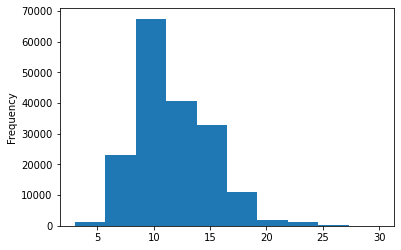

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_sentences = train_df['text'].tolist()
test_sentences = test_df['text'].tolist()
val_sentences = val_df['text'].tolist()

len(train_sentences), len(test_sentences), len(val_sentences)

(180040, 30135, 30212)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df['target'].to_numpy().reshape(-1,1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_df['target'].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df['target'].to_numpy())

In [ ]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

## Model 0: Base line Model Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


#create pipeline
model_0 = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

#fit the pipeline to data
model_0.fit(X=train_sentences, y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X=val_sentences,y=val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_pred = model_0.predict(val_sentences)
baseline_pred

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) *100
  model_precision, model_recall, model_f1score, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"Accuracy": model_accuracy, "Precision": model_precision, "Recall value": model_recall, "F1-Score": model_f1score}

  return model_results

In [ ]:
model_0_results = calculate_results(val_labels_encoded, baseline_pred)

In [ ]:
model_0_results

{'Accuracy': 72.1832384482987,
 'Precision': 0.7186466952323352,
 'Recall value': 0.7218323844829869,
 'F1-Score': 0.6989250353450294}

In [ ]:
# create a text vectorization layer
from tensorflow.keras import layers


In [ ]:
text_vectorizer = layers.TextVectorization(max_tokens=68000, output_sequence_length=55)

In [ ]:
text_vectorizer.adapt(train_sentences)
vocabulary = text_vectorizer.get_vocabulary()
len(vocabulary)

64841

In [ ]:
embedding = layers.Embedding(input_dim = len(vocabulary), output_dim = 128, mask_zero=True)


In [ ]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Model 1: Conv 1D 

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
input = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(input)
x = embedding(x)
x = layers.Conv1D(filters = 128,
                  kernel_size = 5,
                  strides = 1,
                  activation='relu',
                  padding='same')(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(5, activation = 'softmax')(x)

model_1 = tf.keras.Model(input, output, name = "skimlit_model_1")

In [ ]:
model_1.summary()

Model: "skimlit_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 128)           82048     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)           

In [ ]:
model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_1 = model_1.fit(train_dataset, epochs = 5, validation_data = val_dataset)

Epoch 1/5
  71/5627 [..............................] - ETA: 10:07 - loss: 1.4384 - accuracy: 0.3636

KeyboardInterrupt: ignored

In [ ]:
model_1_pred = tf.argmax(model_1.predict(val_dataset), axis=1)
model_1_results = calculate_results(val_labels_encoded, model_1_pred)


In [ ]:
model_1_results

## Model 2: Feature extractor with pre-trained embeddings


In [ ]:
import tensorflow_hub as hub

encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=False)

input = layers.Input(shape = [], dtype = tf.string)
x = encoder_layer(input)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(5, activation = 'softmax')(x)

model_2 = tf.keras.Model(input, output, name="skimlit_model_2")

In [ ]:
model_2.summary()

In [ ]:
model_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_2 = model_2.fit(train_dataset, epochs = 5, steps_per_epoch=len(train_dataset), validation_data = val_dataset, validation_steps = len(val_dataset))

In [ ]:
model_2_pred = tf.argmax(model_2.predict(val_dataset), axis=1)
model_2_results = calculate_results(val_labels_encoded, model_2_pred)

In [ ]:
model_2_results

## Model 3: Conv1D with Character Level embeddings

In [ ]:
def split_chars(text):
  return " ".join(list(text))


train_chars = [split_chars(sentence) for sentence in train_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]

In [ ]:
train_chars

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
import numpy as np
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
output_seq_len = int(np.percentile(char_lens, 95))

In [ ]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
NUM_CHAR_TOKENS = len(alphabet) +2
from tensorflow.keras import layers

In [ ]:

char_vectorizer = layers.TextVectorization(max_tokens=NUM_CHAR_TOKENS, output_sequence_length=output_seq_len)
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()

In [ ]:
char_embedding = tf.keras.layers.Embedding(input_dim = len(char_vocab), output_dim = 25, mask_zero=True)


In [ ]:
input = layers.Input(shape = [], dtype=tf.string)
x = char_vectorizer(input)
x = char_embedding(x)
x = layers.Conv1D(64,kernel_size=5,activation='relu', padding="same")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(5, activation='softmax')(x)

model_3 = tf.keras.Model(input, output, name="skimlit_model_3")

In [ ]:
model_3.summary()

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE) 

In [ ]:
model_3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_3 = model_3.fit(train_char_dataset, 
                        epochs = 5, 
                        validation_data = val_char_dataset)

In [ ]:
model_3_pred = model_3.predict(val_dataset)
model_3_pred = tf.argmax(model_3_pred, axis=1)
print(model_3_pred)
print(val_labels_encoded.shape)
model_3_result = calculate_results(val_labels_encoded, model_3_pred)

## Model 4

In [ ]:
token_input = layers.Input(shape=[], dtype="string")
token_embeddings = encoder_layer(token_input)
token_output = layers.Dense(128, activation='relu')(token_embeddings)

token_model = tf.keras.Model(token_input, token_output, name="token_model")

char_input = layers.Input(shape=(1,), dtype="string")
char_vectorizer_data = char_vectorizer(char_input)
char_embeddings = char_embedding(char_vectorizer_data)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)

char_model = tf.keras.Model(char_input, char_bi_lstm, name = "char_model")


token_char_concatenate = layers.Concatenate(name="token_char_hybrid")([token_model.output, char_model.output])

combined_dropout = layers.Dropout(0.5)(token_char_concatenate)

combined_dense = layers.Dense(128, activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(5, activation='softmax')(final_dropout)

model_4 = tf.keras.Model(inputs = [token_model.input, char_model.input], outputs = output_layer, name="final_model_4")

In [ ]:
model_4.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])


In [ ]:
## combiniing char and token type dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_4.fit(train_char_token_dataset, epochs=5, steps_per_epoch=0.1 * len(train_char_token_dataset),
            validation_data=val_char_token_dataset, validation_steps=0.1*len(val_char_token_dataset))

Epoch 1/5
562/562 [==============================] - 192s 317ms/step - loss: 0.9930 - accuracy: 0.6045 - val_loss: 0.7935 - val_accuracy: 0.6947
Epoch 2/5
562/562 [==============================] - 174s 309ms/step - loss: 0.8037 - accuracy: 0.6882 - val_loss: 0.7287 - val_accuracy: 0.7253
Epoch 3/5
562/562 [==============================] - 175s 312ms/step - loss: 0.7793 - accuracy: 0.7054 - val_loss: 0.6995 - val_accuracy: 0.7355
Epoch 4/5
562/562 [==============================] - 177s 315ms/step - loss: 0.7493 - accuracy: 0.7173 - val_loss: 0.6735 - val_accuracy: 0.7533
Epoch 5/5
562/562 [==============================] - 171s 303ms/step - loss: 0.7452 - accuracy: 0.7204 - val_loss: 0.6686 - val_accuracy: 0.7441
